# **Bellabeat Case Study: How Can a Wellness Technology Company Play It Smart?**

### **Introduction**
In this case study, we will perform real-world tasks of a junior data analyst. We will be working for Bellabeat, a high-tech manufacturer of health-focused products for women. In order to answer the key business questions, we will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

### **About the company**
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. The company also offers a range of different products focused on health of users.

* Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
* Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
* Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
* Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

### **Buisness Task**
Analyze smart device data to gain insight into how consumers are using their smart devices and guide them to discover marketing strategy for the company. We will present our analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

### **About the data**
We will be using [Fitbit Fitness Tracker Darta](https://www.kaggle.com/arashnic/fitbit) dataset made available by [Möbius](https://www.kaggle.com/arashnic). This dataset contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

### **Loading the libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### **Read the data**

In [2]:
daily_activities = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_intensities = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_calories = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_steps = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")



### **Overview of the data**
We will just have a overview of the dataframes with the help of head function.


In [3]:
daily_activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [6]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [7]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [8]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


### **Checking the datatypes for each column**
We will check if the datatypes of each column are correct or if we need to make any changes.

In [9]:
daily_activities.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [10]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [11]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [12]:
hourly_intensities.dtypes

Id                    int64
ActivityHour         object
TotalIntensity        int64
AverageIntensity    float64
dtype: object

In [13]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [14]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

### **Correcting the dataypes of date columns**
We will use the to_datetime to create uniformity in the dates and convert the object type columns to datetime columns.

In [15]:
daily_activities['ActivityDate'] = pd.to_datetime(daily_activities['ActivityDate'])

In [16]:
daily_activities.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [17]:
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])

In [18]:
sleep_day.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [19]:
weight_log['Date'] = pd.to_datetime(weight_log['Date'])

In [20]:
weight_log.dtypes

Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

In [21]:
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])

In [22]:
hourly_intensities.dtypes

Id                           int64
ActivityHour        datetime64[ns]
TotalIntensity               int64
AverageIntensity           float64
dtype: object

In [23]:
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])

In [24]:
hourly_calories.dtypes

Id                       int64
ActivityHour    datetime64[ns]
Calories                 int64
dtype: object

In [25]:
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

In [26]:
hourly_steps.dtypes

Id                       int64
ActivityHour    datetime64[ns]
StepTotal                int64
dtype: object

### **Checking the null values in each dataframe**

In [27]:
daily_activities.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [28]:
sleep_day.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [29]:
weight_log.isnull().sum()

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

In [30]:
hourly_intensities.isnull().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

In [31]:
hourly_calories.isnull().sum()

Id              0
ActivityHour    0
Calories        0
dtype: int64

In [32]:
hourly_steps.isnull().sum()

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

### **Inspecting the null values**
So we found that in wait_log dataframe there are 65 null values in Fat column. Let's dive deep into the dataframe to find more about the null values.

In [33]:
print(weight_log['Fat'].count)

<bound method Series.count of 0     22.0
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
Name: Fat, Length: 67, dtype: float64>


So there are total 67 rows in the Fat column of weight_log data frame and 65 of the values are null. Since we can't get the data for missing fields and putting average of Fat values will not work so we will drop the Fat column and work with the rest of columns.

### **Dropping Fat column of weight_log dataframe**

In [34]:
weight_log = weight_log.drop(['Fat'],axis=1)

In [35]:
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   BMI             67 non-null     float64       
 5   IsManualReport  67 non-null     bool          
 6   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 3.3 KB


### **Splitting the date and time value in hourly_intesities, hourly_calories and hourly_steps dataframes**
This will help us later to easily merge dataframes based on the dates.

In [36]:
hourly_intensities['ActivityDate'] = pd.to_datetime(hourly_intensities['ActivityHour']).dt.date
hourly_intensities['ActivityTime'] = pd.to_datetime(hourly_intensities['ActivityHour']).dt.time
hourly_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
 4   ActivityDate      22099 non-null  object        
 5   ActivityTime      22099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.0+ MB


In [37]:
hourly_calories['ActivityDate'] = pd.to_datetime(hourly_calories['ActivityHour']).dt.date
hourly_calories['ActivityTime'] = pd.to_datetime(hourly_calories['ActivityHour']).dt.time
hourly_calories.head()

,Id,ActivityHour,Calories,ActivityDate,ActivityTime
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00


In [38]:
hourly_steps['ActivityDate'] = pd.to_datetime(hourly_calories['ActivityHour']).dt.date
hourly_steps['ActivityTime'] = pd.to_datetime(hourly_calories['ActivityHour']).dt.time
hourly_steps.head()

,Id,ActivityHour,StepTotal,ActivityDate,ActivityTime
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,04:00:00


### **Deriving the week day name and number from date column**
This will help us to track the users activities based on each day of a week,

In [39]:
daily_activities['WeekDay'] = daily_activities['ActivityDate'].dt.day_name()
daily_activities['DayNum'] = daily_activities['ActivityDate'].dt.day_of_week
daily_activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay,DayNum
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,5


### **Merging the data**
Merging the daily_activities dataframe with the sleep_day dataframe

In [40]:
daily_activities_merged = pd.merge(daily_activities, sleep_day, left_on=['ActivityDate','Id'], right_on=['SleepDay','Id'], how='inner')
daily_activities_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay,DayNum,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,Tuesday,1,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,Wednesday,2,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,Friday,4,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,Saturday,5,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,Sunday,6,2016-04-17,1,700,712


### **Description of the datasets using describe function**
This function will describe about the mean, count, minimum and maximum values of each numerical column in the dataframe

In [41]:
daily_activities.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayNum
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000


In [42]:
sleep_day.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [43]:
weight_log.describe()

,Id,WeightKg,WeightPounds,BMI,LogId
count,6.700000e+01,67.000000,67.000000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,47.540001,1.463098e+12


In [44]:
hourly_intensities.describe()

,Id,TotalIntensity,AverageIntensity
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,12.035341,0.200589
std,2.422500e+09,21.133110,0.352219
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000
50%,4.445115e+09,3.000000,0.050000
75%,6.962181e+09,16.000000,0.266667
max,8.877689e+09,180.000000,3.000000


In [45]:
hourly_calories.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [46]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


### **Observation from the describe function**

* On an average the customers are lightly active for about 193 minutes (3 hr) which could be one of the factors we need to look.
* On an average the cusotmers are sedenatary for about 991 minutes (16.5 hr) which could be turned into active hours.
* The average steps taken by the customers are about 7637  and the average distance covered is bout 5.5 kilometres which could be increased.
* The average calories burned is about 2300 which is also one of the factor to look upon.
* The average BMI is 25.1 which is just a bit over the normal range.
* The average sleep time is about 6.9 hrs and the average bed time is about 7.6 hrs. 






### **Creating visualizations**
We will create plots to observe the data visually and draw conclusion from the data.

### **Lightly active minutes by day**
We will plot a graph to observe how the users are lightly active on each day of week

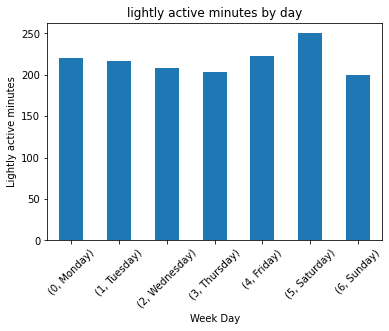

In [47]:
daily_activities_merged[['LightlyActiveMinutes', 'WeekDay', 'DayNum']].groupby(['DayNum', 'WeekDay']).mean().sort_index().plot(kind='bar', legend=None)
plt.title('lightly active minutes by day')
plt.xlabel('Week Day')
plt.ylabel('Lightly active minutes')
plt.xticks(rotation=45)
plt.show()

### **Total minutes asleep vs Sedentary minutes**
We will create a graph to observe the total minutes asleep vs the sedentary minutes.

Text(0.5, 1.0, 'Total minutes asleep vs Sedentary minutes')

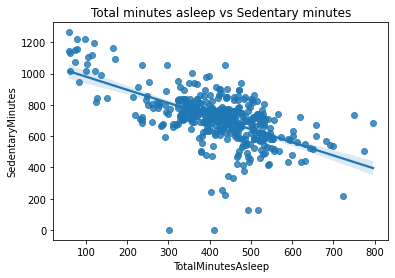

In [48]:
sns.regplot(x= daily_activities_merged['TotalMinutesAsleep'], y= daily_activities_merged['SedentaryMinutes'])
plt.title('Total minutes asleep vs Sedentary minutes')

### **Total steps vs calories burned**
We will plot a chart to observe the relationship between total steps vs calories burned by users

Text(0.5, 1.0, 'Total Steps vs calories burned')

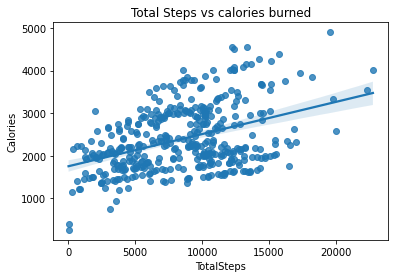

In [49]:
sns.regplot(x = daily_activities_merged['TotalSteps'], y= daily_activities_merged['Calories'])
plt.title('Total Steps vs calories burned')

### **Total Distance vs Week Day**
We will plot a chart to observe total distance covered in each day of week

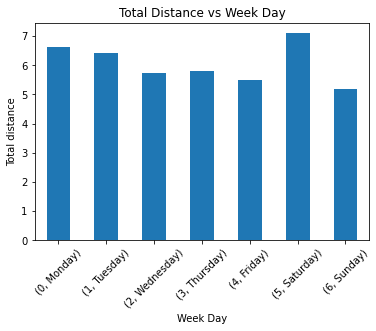

In [50]:
daily_activities_merged[['TotalDistance', 'WeekDay', 'DayNum']].groupby(['DayNum', 'WeekDay']).mean().sort_index().plot(kind='bar', legend=None)
plt.xticks(rotation=45)
plt.title('Total Distance vs Week Day')
plt.xlabel('Week Day')
plt.ylabel('Total distance')
plt.show()

### **Total Minutes Asleep vs Total time in bed**
We will plot a chart to observe the relationship between total minutes asleep vs total time in bed

Text(0.5, 1.0, 'Total Minutes Asleep vs Total time in bed')

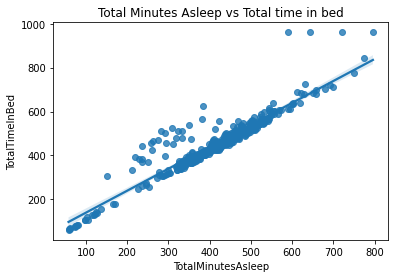

In [51]:
sns.regplot(x= daily_activities_merged['TotalMinutesAsleep'], y= daily_activities_merged['TotalTimeInBed'])
plt.title('Total Minutes Asleep vs Total time in bed')

### **Observation fromt the visulaization**
* The users are more likely to be lightly active on fridays and saturdays.
* The relation between the sleep duration and sedentary minutes is negative which means more the sedentary minutes of a user the less is the sleep duration.
* The relationship between total steps and calories burned is positive which is expected as the more steps taken by user will result in more calories burned.
* The total distance covered on sundays is very low as compared to the other days.
* The relationship between the total minutes asleep and total time in bed is positive and for most part the time users spent asleep and the time spent by them in bed was very similar.

### **Recommendations for the business**
* The average steps per day is around 7500 which is less than the recommended steps per day by the CDC. It should be around more than 8000 per day. The bellabeat app could encourage the users to increase the step count by adding a share button in the app so that users could share their progress on social media which would create a competitive environment among the user's social media friends and could result in increse in steps count.
* The average sleep duration of users is about 6.9 hrs, since the age group of the users are not given so considering the age group of users as between 18-60, the average sleep duration per day should be about 7-9 hrs per day as per the CDC. We observed in the visualizaiton that more the sedentary minutes less the sleep duration. Bellabeat app should introduce a point table scheme where users would be given point on the duration they are active which would decerese the sedentary minutes and would improve the sleep duration.
* The total distance covered on sundays is very low as compared to other week days. Considering sunday as holiday in most parts of the world, the users may tend to be more relaxed on sundays. Bellabeat app should organize weekly contest on sundays and some rewards like discount in the memebership of the app should be given to some users who topped the distance covered and let them share the result on their social media handles, this would result in converting casual users into membership users and sharing these rewards on socail media would bring more traffic.
* The average BMI is about 25.1 which is just a bit above the healthy range. According to the CDC, the healthy range for BMI is between (18.5-24.9). The users should be encouraged to enter correct weights and heights and update them regularly to calculate the BMI with more accuracy and the Bellabeat app should provide alerts on a periodic basis if their BMI is above or below this range.
* The Bellabeat's 'Spring' product which can track the hydration level in users is very innovative and similar products to that are not extensively available in the market, the company should promote more for this product by providing it at a discount price to it's membership users and let them share their achievement in social media platforms if they keep themselves hydarated in right amount in a day and could create a streak based on that to show they are consistent towards it.


